# Les incertitudes de mesure

## Qu'est-ce qu'une incertitude ?

### Rappels
L'__incertitude__ du résultat d'un mesurage est un paramètre positif qui caractérise la dispersion des valeurs attribuées à un mesurande, à partir des informations utilisées.

L'__incertitude-type__ est une incertitude de mesure exprimée sous la _forme_ d'un écart-type.

### Caractère statistique

L'incertitude-type permet d'attribuer une vision statistique à la notion de dispersion. L'idée est la suivante : 

> __si l'on repète $N$ fois la même expérience dans les mêmes conditions, on va pouvoir mesurer $N$ résultats de mesurages différents d'une grandeur $X$ (notés $x_i$ avec $i$ allant de 1 à $N$). On obtient ainsi une statistique des valeurs mesurées dont on peut associer la moyenne au__ résultat de mesurage et __l'écart-type__ à l'incertitude-type.

Grâce à cette vision, on peut :
* Visualiser (histogramme) la dispersion des mesures à partir de _mesures réelles_ ou par des _simulations de tirages aléatoires_ (on "simule" N expériences) et en tirer des informations.
* Utiliser les propriétés mathématiques de la variance et de l'écart-type pour calculer des incertitudes-types (puisqu'on les assimile à des écart-types).

#### Exemple : dispersion de résultat expérimentaux.

````{admonition} Un exemple de dispersion
:class: tip
[Ci-dessous](rcexp_fig), on analyse les résultats du mesurage du temps caractéristique d'un circuit RC ainsi que le calcul de la valeur mesurée et de l'incertitude-type grâce à cette distribution. On a réalisé 1000 mesures grâce à un microcontroleur.

```{glue:figure} rc_exp
:name: rcexp_fig
Répartition des mesures
```

La distribution des mesures a pour moyenne {glue:text}`tau:.3f` ms et pour écart-type {glue:text}`utau:.3f` ms"
````

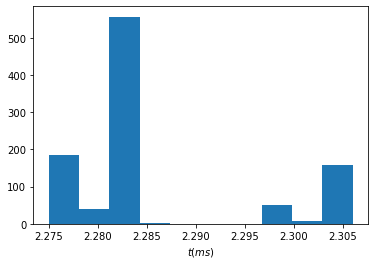

2.285777

0.009657667500051051

La distribution des mesures a pour moyenne 2.29 ms et pour écart-type 0.01 ms


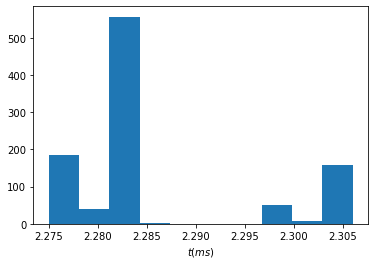

In [1]:
from myst_nb import glue
from reponses.reponses import etude_rc
f, tau, utauA = etude_rc()
glue("rc_exp", f, display=False)
glue("tau", tau, display=False)
glue("utau", utauA, display=False)
print("La distribution des mesures a pour moyenne {:.2f} ms et pour écart-type {:.2f} ms".format(tau, utauA))

#### Exemple : Simulation de mesures
````{admonition} Un exemple de simulation
:class: tip
Cette fois, on ne va pas déduire de nombreuses mesures l'écart-type et le résultat de mesurage mais on va simuler de nombreuses mesures connaissant la distribution statistique.

On suppose qu'on a réalisé la mesure d'une tension $U$ et qu'on a obtenu un résultat de mesurage $U_{mes} = 3.4 V$ avec une incertitude $u(U) = 0.2 V$ (on verra plus tard des méthodes d'estimation de $u(U)$). On a estimé que la distribution statistique associée à cette mesure est une distribution gaussienne (ou normale). On va simuler $N = 1000000$ tirages de $U$ (comme si on réalisait _par la pensée_ N fois l'expérience) en associant à U une distribution gaussienne d'espérance 3.4 et d'écart-type 0.2.

Observez [ci-dessous](usimul_fig) l'histogramme des valeurs obtenues. On a aussi représenté la courbe de la distribution gaussienne théorique associée.

```{glue:figure} u_simul
:name: usimul_fig
Simulation de valeurs de U
```
````

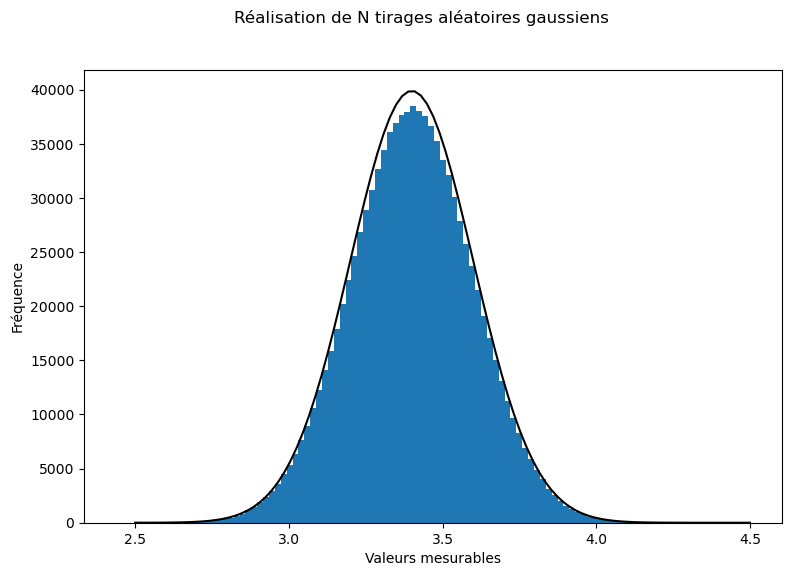

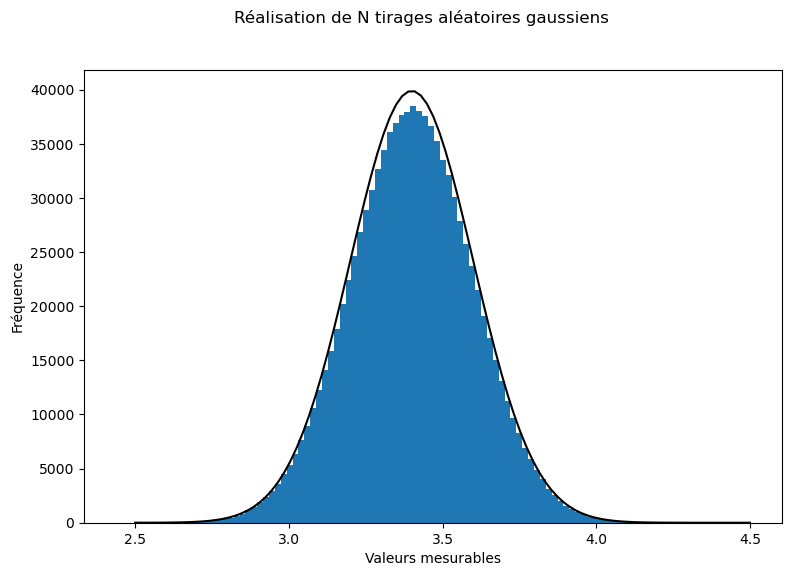

In [2]:
from reponses.reponses import simul_u
N = 1000000  # Nombre de tirages
f = simul_u(N)
glue("u_simul", f, display=False)

### Incertitude : pourquoi faire ?
Quantifier la dispersion des résultats de mesure peut avoir plusieurs intérêts. Citons-en deux:

#### Estimer la dispersion de la valeur d'un composant
On veut produire des composants possédant une valeur particulière.

> Quantifier la dispersion des mesures sur un échantillon permet de __prévoir dans quelle gamme de valeur seront les composants fabriquées ensuite__.

```{admonition} Exemple
:class: tip
Un fabriquant d'électronique produit des résistances dont la valeur doit être $R$

La mesure des résistances d'échantillons-test donnent la dispersion des valeurs sous forme d'une incertitude $u(R)$. Il la fournit à ses clients qui pourront alors considérer que les résistances fabriquées par la suite (du moins 95 ou 99 %)  auront une valeur de résistance $R_f$ comprise entre $R - k \times u(R)$ et $R + k \times u(R)$ (k étant connu).
```

```{note}
_Dans le cadre des TPs, on pourra aussi chercher à mesurer __la valeur d'un composant qu'on compte utiliser ensuite dans un montage__. L'estimation de l'incertitude sur la valeur mesurée nous donnera l'intervalle dans laquelle on peut considérer que la valeur du composant se situe durant l'expérience._
```

#### Controler la valeur d'une grandeur connue ou une loi physique

On désire étudier un phénomène physique reliant certaines grandeurs ou faisant intervenir une grandeur dont on connaît théoriquement (ou par des expériences réalisées en laboratoire) une valeur relativement précise.

> Quantifier la dispersion des mesures qu'on obtient en répétant la manipulation (ou qu'on aurait obtenu en répétant la manipulation) permet d'__avoir un intervalle de valeur acceptables qu'on va comparer avec la valeur (ou un intervale de valeurs) théorique/précise attendue ou avec la relation théorique prévue__. On peut ainsi vérifier la cohérence entre la théorie ou la valeur d'une grandeur théorique et l'expérience réalisée.

```{admonition} Exemple
:class: tip
On veut mesurer la constante des gaz parfaits.

On va trouver une gamme de valeurs dans laquelle on peut considérer que les résultats de mesure se trouveraient si on réalisait un grand nombre d'expérience par la même méthode. On pourra comparer ces résultats à la valeur attendue (incertaine mais souvent connue avec moins de variabilité que par notre expérience).
```

```{note}
_Dans le cas des TPs, les relations théoriques et les valeurs théoriques prévues sont toujours valables. Un désaccord signifie un problème au niveau de la manipulation(!) ou du choix du modèle, pas de la théorie !_
```

#### Quand estimer une incertitude ?

> On remarquera qu'évaluer une incertitude répond à un but. Il n'est donc pas nécessaire de chercher systématiquement à l'estimer : il faut se demander si c'est nécessaire. 

```{margin}
_Cela étant dit, on pourra l'estimer plus souvent que nécessaire à titre d'entraînement._
```

## Estimer une incertitude de mesure : Type A et B
Il existe deux méthodes pour estimer une incertitude de mesure :

```{important}
* __Evaluation de Type A__ : évaluation d’une composante de l’incertitude par une analyse statistique des valeurs mesurées. On réalise plusieurs mesures dans les mêmes conditions expérimentales.
* __Evaluation de Type B__ : évaluation d’une composante de l’incertitude par d’autres moyens qu’une évaluation de type A. Pour nous, il s'agit d'estimer une incertitude alors qu'on a réalisé qu'une seule mesure.
```

### Evaluation de type A

Une évaluation de type A peut-être réalisée en répétant $N$ fois la même expérience soit manuellement, soit de manière automatique (un micro-controlleur comme Arduino est alors très pratique), soit en regroupant les mesures de plusieurs groupes de TPs.

On considère alors que le résultat de mesurage sera la __moyenne des valeurs mesurées uniques__ et que l'incertitude sera l'écart-type sur l'__estimation de cette moyenne__ (cf. suite).

#### Contrôle des mesures

```{attention}
Avant de se lancer dans une exploitation des données, il est important de vérifier qu'il n'y a pas de mesures aberrantes dans les échantillons. C'est notamment important lorsque les mesures sont automatiques ou qu'elles viennent d'autres groupes. 

En général, la première analyse est __graphique__. On peut:
* tracer un histogramme des mesures (utile quand il y a beaucoup de mesures).
* tracer une carte de controle des mesures (résultat de mesurage avec incertitude en fonction du numéro de l'échantillon).
```

#### Estimation d'un résultat de mesure et de son incertitude
Il n'est pas nécessaire de connaître ces formules mais voici les méthodes de calculs du résultat de mesure et de l'incertitude que nous utiliserions :

On suppose qu'on a réalisé $k$ mesures $\{g_i\}$ d'un mesurande $G$.

__Estimation de la moyenne :__

$$ G_{mes} = {1 \over k} \sum_{i=1}^{k}g_i$$

__Estimation de l'incertitude :__
    
$$ u(G) = \sqrt{{1 \over k(k-1)} \sum_{i=1}^{k}(g_i - G_{mes})^2}$$

### Evalution de type B

L'évaluation de type A prend beaucoup de temps et nous devrons plus souvent évaluer une incertitude à partir d'une mesure unique. La méthode consiste alors à :
1. faire un bilan des __sources d'incertitudes__ qui provoquent la variabilité de la mesure.
2. associer à chaque sources d'incertitude des __éléments statistiques__ : forme de la distribution, largeur de la distribution, écart-type...
3. combiner les sources d'incertitudes précédentes pour estimer l'incertitude totale sur le mesurande considérer.

Nous allons voir par la suite comment réaliser ces étapes qu'on appelle __bilan d'incertitude__